In [3]:
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import random as rd
from Bio import SeqIO

# 벡터화된 Data input

In [4]:
#4-mer 변환을 거침
vi = np.loadtxt("virus_tr.txt") 
vi2 = np.loadtxt("vi2.txt")
vi3 = np.loadtxt("vi3.txt")

# 세균2개와 바이러스1개가 합쳐진 Dataset생성

In [5]:
#데이터를 3개합침
X = np.r_[vi2,vi3]
X = np.r_[X,vi]

# K-mean Clustering

In [6]:
m=X.shape[0] 
n=X.shape[1] 
K=3# 클러스터 개수
n_iter=100 # 반복 횟수
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
for i in range(K): 
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가

print(X.shape) # 4mer로 했기때문에 136개의 Y값

(300, 136)


In [7]:
Output={} # 출력값
# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
Centroids[:,0]
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
#tempDist 

In [8]:
for i in range(n_iter):
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] 
    C=np.argmin(EuclidianDistance,axis=1)+1
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(136,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] 
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y
    


# Clustering완료후 결과 분석

In [9]:
#X의 어떤 contig가 어디로 분류되었는지 출력

cnt=0
for k in range(1,4): 
    print("Clustering",k,"개수 ",len(Output[k]))
    for i in range(len(Output[k])): 
        
        for a in range(len(X)):

            if np.array_equal(X[a],Output[k][i]) == True:

                print("X[",a,"] == Output[",k ,"][", i,"]")
                cnt+=1
print(cnt)



Clustering 1 개수  70
X[ 18 ] == Output[ 1 ][ 0 ]
X[ 143 ] == Output[ 1 ][ 1 ]
X[ 202 ] == Output[ 1 ][ 2 ]
X[ 204 ] == Output[ 1 ][ 3 ]
X[ 205 ] == Output[ 1 ][ 4 ]
X[ 206 ] == Output[ 1 ][ 5 ]
X[ 207 ] == Output[ 1 ][ 6 ]
X[ 208 ] == Output[ 1 ][ 7 ]
X[ 213 ] == Output[ 1 ][ 8 ]
X[ 216 ] == Output[ 1 ][ 9 ]
X[ 217 ] == Output[ 1 ][ 10 ]
X[ 219 ] == Output[ 1 ][ 11 ]
X[ 220 ] == Output[ 1 ][ 12 ]
X[ 221 ] == Output[ 1 ][ 13 ]
X[ 224 ] == Output[ 1 ][ 14 ]
X[ 225 ] == Output[ 1 ][ 15 ]
X[ 226 ] == Output[ 1 ][ 16 ]
X[ 227 ] == Output[ 1 ][ 17 ]
X[ 228 ] == Output[ 1 ][ 18 ]
X[ 229 ] == Output[ 1 ][ 19 ]
X[ 233 ] == Output[ 1 ][ 20 ]
X[ 234 ] == Output[ 1 ][ 21 ]
X[ 235 ] == Output[ 1 ][ 22 ]
X[ 236 ] == Output[ 1 ][ 23 ]
X[ 237 ] == Output[ 1 ][ 24 ]
X[ 239 ] == Output[ 1 ][ 25 ]
X[ 240 ] == Output[ 1 ][ 26 ]
X[ 242 ] == Output[ 1 ][ 27 ]
X[ 243 ] == Output[ 1 ][ 28 ]
X[ 244 ] == Output[ 1 ][ 29 ]
X[ 245 ] == Output[ 1 ][ 30 ]
X[ 248 ] == Output[ 1 ][ 31 ]
X[ 249 ] == Output[ 1 ][ 32 ]
X

In [10]:
records = list(SeqIO.parse("virus_tr.fastq", "fastq"))
records2 = list(SeqIO.parse("vi2.fastq", "fastq"))
records3 = list(SeqIO.parse("vi3.fastq", "fastq"))


for k in range(1,4): 
    print("Clustering",k,"개수 ",len(Output[k]))
    for i in range(len(Output[k])): 
        
        for a in range(len(records)):

            if np.array_equal(X[a],Output[k][i]) == True:

                print("Output[",k ,"][", i,"] == ",records[a].description.split(";")[3])
                

Clustering 1 개수  70
Output[ 1 ][ 0 ] ==  chromosome=k99_1631130_flag=1_multi=1.0263_len=10143
Clustering 2 개수  105
Output[ 2 ][ 0 ] ==  chromosome=k99_4269318_flag=0_multi=1.0082_len=17357
Output[ 2 ][ 1 ] ==  chromosome=k99_2011833_flag=0_multi=1.0018_len=10088
Output[ 2 ][ 2 ] ==  chromosome=k99_3641453_flag=0_multi=1.0060_len=24284
Output[ 2 ][ 3 ] ==  chromosome=k99_503308_flag=0_multi=1.0077_len=12383
Output[ 2 ][ 4 ] ==  chromosome=k99_4605346_flag=1_multi=1.0005_len=83030
Output[ 2 ][ 5 ] ==  chromosome=k99_630168_flag=0_multi=1.0036_len=5940
Output[ 2 ][ 6 ] ==  chromosome=k99_3146727_flag=0_multi=1.0105_len=30748
Output[ 2 ][ 7 ] ==  chromosome=k99_795898_flag=0_multi=1.0200_len=8991
Output[ 2 ][ 8 ] ==  chromosome=k99_4605346_flag=1_multi=1.0005_len=83030
Output[ 2 ][ 9 ] ==  chromosome=k99_503308_flag=0_multi=1.0077_len=12383
Output[ 2 ][ 10 ] ==  chromosome=k99_4269318_flag=0_multi=1.0082_len=17357
Output[ 2 ][ 11 ] ==  chromosome=k99_2661351_flag=1_multi=1.0309_len=6637
Ou

# Clustering 시각화

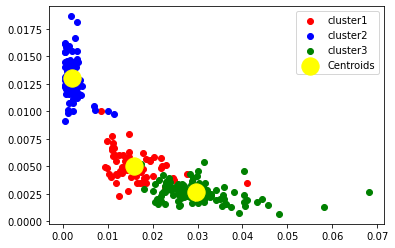

In [11]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')

plt.legend()
plt.show()


# TSNE 시각화

/Users/suhyeonglee/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

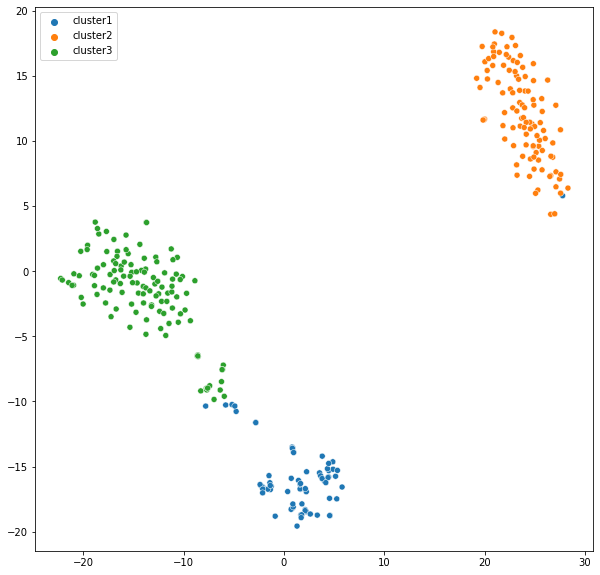

In [12]:
data = np.append(Output[1],Output[2],axis=0)
data2 = np.append(data,Output[3],axis=0)

labels  = ["cluster1" for x in range(len(Output[1]))]
labels  += ["cluster2" for x in range(len(Output[2]))]
labels  += ["cluster3" for x in range(len(Output[3]))]
labels = np.array(labels)


tsne = TSNE(n_components=2)
data_2d = tsne.fit_transform(data2)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data_2d[:,0], data_2d[:,1], hue=labels)

# 대조군이 있을때 대조군과의 유사도 확인

In [13]:
#대조 Data
ho1 = np.loadtxt("ho1.txt")
ho2 = np.loadtxt("ho2.txt")
ho3 = np.loadtxt("ho3.txt")
ho4 = np.loadtxt("ho4.txt")

In [14]:
from Bio import SeqIO
records = list(SeqIO.parse("ho1.fastq", "fastq"))
print(records[1])

ID: m1/3000/CCS
Name: m1/3000/CCS
Description: m1/3000/CCS Read=1;length=3000bp;startpos=0;chromosome=NC_010681.1#3k#399057#402056;numberOfErrors=80;totalErrorProb=0.0212;passes=3.813563723790725;passesLeft=3;passesRight=4;cutPosition=559
Number of features: 0
Per letter annotation for: phred_quality
Seq('TCGATCCAGTGCAGCGGGCGAGGCGCATCGACGGCTTGCGCGGGCGACATCGGT...TCC')


# 코사인 유사도 함수

In [15]:
from numpy import dot
from numpy.linalg import norm


# cos 유사도를 이용해 분류 계산
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

#클러스터링 된것의 center점과 특정 비교군 계산
def calculate(data):
    cnt = [0 for i in range(K)]
    for i in range(len(data)):
        for j in range(len(cnt)):
            #print(cos_sim(data[i],Centroids[:,j]))
            cnt[j]= cnt[j]+cos_sim(data[i],Centroids[:,j])
    
    
    num = cnt.index(max(cnt))+1
    per = max(cnt)/len(data)*100
    return per,num

def printcal(data):
    cnt = [0 for i in range(len(data))]
    for i in range(len(data)):
#         if(cnt[calculate(data[i])[1]]<=calculate(data[i])[0]):
#             cnt[calculate(data[i])[1]] = calculate(data[i])[0]
        print(i+1,"번 비교군은 클러스터" ,calculate(data[i])[1],"번과 코사인유사도",calculate(data[i])[0],"% 유사" )



# 코사인유사도 결과

In [16]:
arr = [ho1,ho2,ho3,ho4]
printcal(arr)
print()

arr2=[vi,vi2,vi3]
printcal(arr2)

1 번 비교군은 클러스터 2 번과 코사인유사도 92.49650624243357 % 유사
2 번 비교군은 클러스터 2 번과 코사인유사도 91.49863876791427 % 유사
3 번 비교군은 클러스터 3 번과 코사인유사도 92.97401854989687 % 유사
4 번 비교군은 클러스터 1 번과 코사인유사도 92.77811542665654 % 유사

1 번 비교군은 클러스터 1 번과 코사인유사도 94.31506250243672 % 유사
2 번 비교군은 클러스터 2 번과 코사인유사도 98.80338472268454 % 유사
3 번 비교군은 클러스터 3 번과 코사인유사도 98.43976908255104 % 유사


# 마할라노비스 거리 이용

In [18]:
from scipy.spatial import distance

V=np.cov(X.T)
tempnum=9999
ma= [[0 for j in range(2)] for i in range(len(X))]
for i in range(300):
    tempnum=9999
    for j in range(100):
        for k in range(3):
            l=distance.mahalanobis(X[i],arr[k][j],V.T)
            if l<=tempnum :
                tempnum=l
                ma[i][0]=tempnum
                ma[i][1]=k
               


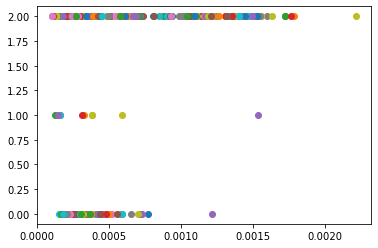

In [21]:

for k in range(300):
    plt.scatter(ma[k][0],ma[k][1])
plt.show()

